<div style="text-align: right">NLP Research, Fall 2021</div>
<div style="text-align: right">Dino Konstantopoulos, 3 November 2021</div>

# Mao Clustering alternatives

We have a k-Means based technique to locate semantic clusters using BERT embeddings. Our technique was also used by Dr. Miller. 

But we still do not have way to verify that our results are *correct*.

Also, there are *three* distinct techniques for clustering: LSI, k-Means and PageRank, that we can use sentence embeddings with. 

We need to compare and contrast them, and find a way to objectively distinguish a good clustering from a bad one. That will be a our goal from the month of November.

# Our Text corpora
I harvested 6 of Mao's writings from [here](https://www.marxists.org/reference/archive/mao/selected-works/index.htm).

In [1]:
import os
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
             print(os.path.join(root, file))

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt


These are the paragraphs, and this is the first one below:

In [2]:
import os
mao_paragraphs = []
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
            #print(paragraphs[0])
            mao_paragraphs.extend(paragraphs)
            
print(len(mao_paragraphs))
print(mao_paragraphs[0])

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt
202
Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take. Though they believe that a revolutionary high tide is inevitable, they do not believe it to be imminent. Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in t

We see that we have about 200 paragraphs and that the first paragraph is kind of looooooooooooooooooooong. Also, Mao tends to write 
long sentences. So, let's stick to sentences instead:

In [3]:
import os
mao_sentences = []
for root, dirs, files in os.walk("c:/Users/Dino/mao"):
    for file in files:
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                sentences = input.read().split(". ")   #. denotes end of sentence
            mao_sentences.extend(sentences)
            
print(len(mao_sentences))
print(mao_sentences[0])

c:/Users/Dino/mao\A SINGLE SPARK CAN START A PRAIRIE FIRE.txt
c:/Users/Dino/mao\ANALYSIS OF THE CLASSES IN CHINESE SOCIETY.txt
c:/Users/Dino/mao\BE CONCERNED WITH THE WELL-BEING OF THE MASSES, PAY ATTENTION TO METHODS OF WORK.txt
c:/Users/Dino/mao\ON CORRECTING MISTAKEN IDEAS IN THE PARTY.txt
c:/Users/Dino/mao\REPORT ON AN INVESTIGATION OF THE PEASANT MOVEMENT IN HUNAN.txt
c:/Users/Dino/mao\WHY IS IT THAT RED POLITICAL POWER CAN EXIST IN CHINA.txt
966
Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take


So we have about 1,000 sentences. Let's do some exploratory data analysis (EDA) so that we have all the intuitions about what our sentences contain. Let’s create a column that contains the length of each sentence to get an idea about the average number of words used in a sentence.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

mao_df = pd.DataFrame(mao_sentences, columns = ['Sentence'])
mao_df.head()

d:\Anaconda3.5.1\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Sentence
0,Some comrades in our Party still do not know h...
1,Though they believe that a revolutionary high ...
2,"Therefore, they disapprove of the plan to take..."
3,"They seem to think that, since the revolutiona..."
4,"Instead, they want to extend our political inf..."


Text(0.5, 1.0, 'Distribution of number of words in each sentence')

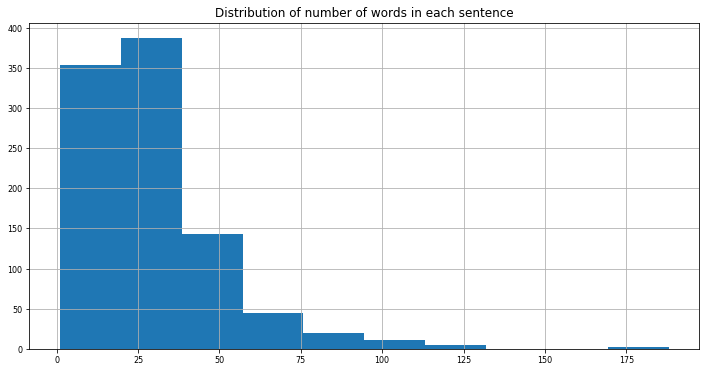

In [5]:
mao_df['NumWords'] = mao_df['Sentence'].apply(lambda x: len(x.split()))
mao_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

Wow, 25 words on average! Now, let's build a word cloud to see the most frequent words. 

In [6]:
all_words = ''.join([word for word in mao_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

'Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to takeThough they believe that a revolutionary high tide is inevitable, they do not believe it to be imminentTherefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political powerThey seem to think that, since the revolutionary high tide is still remote, it will be labour lost to attempt to establish political power by hard workInstead, they want to extend our political influence through the easier method of roving guerrilla actions, and, once th

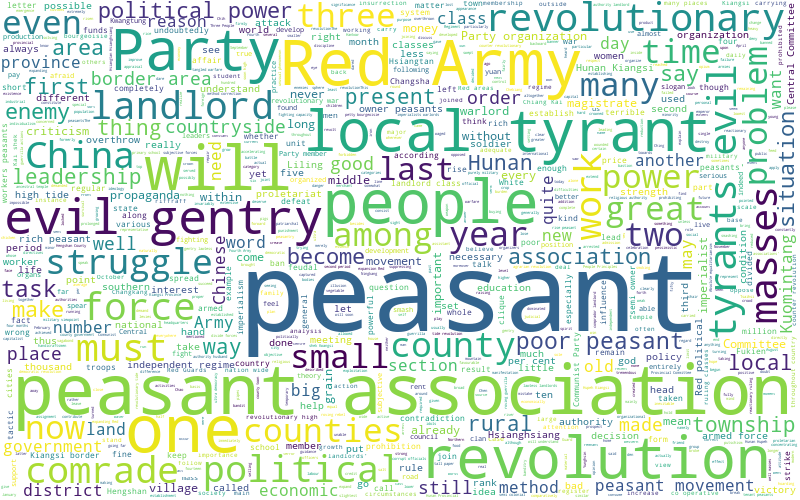

In [7]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

Let's do some cleaning operations like turning all words to lowercase, remove punctuation and non-ASCII characters which are irrelevant for modeling topics.

In [8]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
mao_df['Sentence2'] = mao_df['Sentence'].apply(normalize_texts)
mao_df.head()
mao_df['Sentence2'] = mao_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

Top 30 words used with their frequencies:

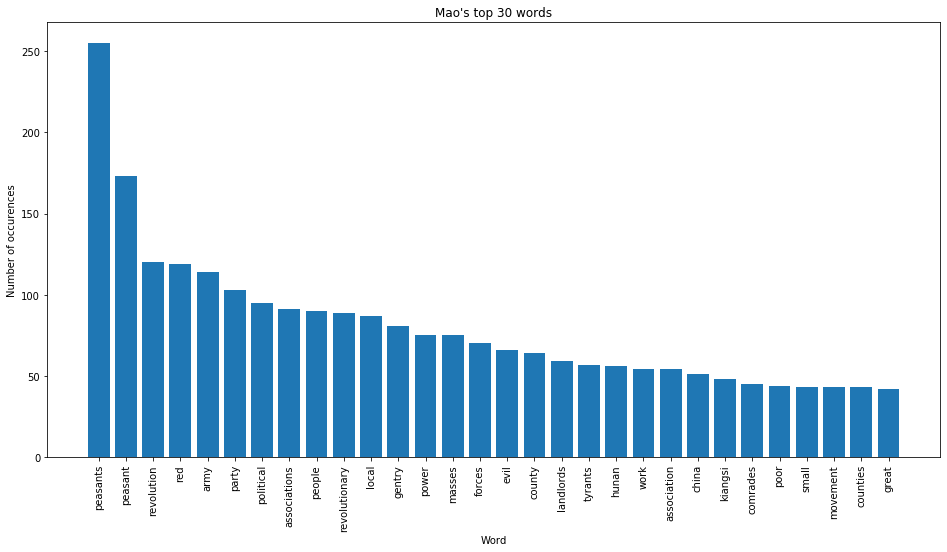

In [9]:
def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(mao_df['Sentence2'], 30):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Mao's top 30 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

Some interesting conclusions: We also need to **stem** words so that `peasants` and `peasant` represents the same occurrence. Also, some words needs to be grouped into bigrams, such as `red army`.

# 1. Text summarization with Matrix decomposition (LSI)
We uncover latent semantic structure of a collection of sentences by a low-dimensional projection that preserves the structure between sentences and words onto a space of a-priori dimension the number of latent (hidden) topics. We then eliminate some of these topics using a threshold approach. This approach yields how much each sentence contributes to each topic (topic weight per sentence) and then, by summing proportionally across topics (first sentence for first topic, first sentence for second topic, etc.), the general relevance of each sentence to corpus comprehension. 

We use the approach from this [paper](https://www.semanticscholar.org/paper/Using-Latent-Semantic-Analysis-in-Text-and-Summary-Steinberger-Jezek/38dde28d624b89ed568976a28dda64f0b0c048c2), which is also detailed in this [book](https://www.amazon.com/Text-Analytics-Python-Real-World-Actionable/dp/148422387X/ref=sr_1_1?crid=5O88QI13LVLI&dchild=1&keywords=text+Analytics+with+Python), and this [summary](https://towardsdatascience.com/document-summarization-using-latent-semantic-indexing-b747ef2d2af6). [This](https://books.google.com/books?id=IimgDQAAQBAJ&pg=PA254&lpg=PA254&dq=salience_scores+%3D+np.sqrt(np.dot(np.square(singular_values)&source=bl&ots=x_JAq2cWMv&sig=ACfU3U3kQ0y561duIY42eWjRjpWIPQK2fQ&hl=el&sa=X&ved=2ahUKEwjplpqBmv3zAhUHoXIEHdXOCBIQ6AF6BAgrEAM#v=onepage&q=salience_scores%20%3D%20np.sqrt(np.dot(np.square(singular_values)&f=false) is where I got the calculus detailed below.

Sentence words are first extracted to form a [term-document matrix](https://en.wikipedia.org/wiki/Document-term_matrix).

We can then apply low-rank Singular Value Decomposition (SVD) to this matrix. The core principle behind Latent Semantic Analysis (LSA) is that in any document, there exists a latent structure among terms that are related contextually and hence should also be correlated in the same singular space.

The main idea is to use SVD on matrix $M$ so that $M = U.S.V^T$ with $U$ and $V$ orthogonal matrices and $S$ a diagonal matrix, which can also be represented as a vector of the singular values. 

The original matrix can be represented as a term-document matrix where the rows are terms (words) and each column is a document (a sentence from our document in our case). The values can be any type of weighting like Bag of Words model-based frequencies, TF-IDFs, or binary occurrences. Here, we use TF-IDF.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dino\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(mao_sentences)

In [12]:
mao_sentences[:3]

['Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take',
 'Though they believe that a revolutionary high tide is inevitable, they do not believe it to be imminent',
 'Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political power']

In [13]:
norm_sentences[:3]

array(['comrades party still know appraise current situation correctly settle attendant question action take',
       'though believe revolutionary high tide inevitable believe imminent',
       'therefore disapprove plan take kiangsi approve roving guerrilla actions three areas borders fukien kwangtung kiangsi time deep understanding means establish red political power guerrilla areas deep understanding idea accelerating nationwide revolutionary high tide consolidation expansion red political power'],
      dtype='<U743')

I cannot believe `not` is a stop word! It completely changes the meaning of a sentence!

In [14]:
'not' in stop_words

True

We need to go through stop words and remove the ones that change meaning:

In [15]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
stop_words_light = set(stop_words) - {'no', 'not', "don't", "won't", 'do', "didn't", 'is', "isn't", "wouldn't"}

In [17]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words_light]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
norm_sentences = normalize_corpus(mao_sentences)

In [18]:
mao_sentences[:3]

['Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take',
 'Though they believe that a revolutionary high tide is inevitable, they do not believe it to be imminent',
 'Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political power']

In [19]:
norm_sentences[:3]

array(['comrades party still do not know appraise current situation correctly settle attendant question action take',
       'though believe revolutionary high tide is inevitable do not believe imminent',
       'therefore disapprove plan take kiangsi approve roving guerrilla actions three areas borders fukien kwangtung kiangsi time do not deep understanding means establish red political power guerrilla areas do not deep understanding idea accelerating nationwide revolutionary high tide consolidation expansion red political power'],
      dtype='<U746')

Let's vectorize our normalized sentences using TF-IDF feature engineering. We keep things simple and don’t filter out any words based on document frequency. But feel free to try that out and maybe even leverage n-grams as features.

`td_matrix` weighs the originality of terms (words):

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(3821, 966)


,0,1,2,3,4,5,6,7,8,9,...,956,957,958,959,960,961,962,963,964,965
abandon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abandoned,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ability,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abolish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abolished,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abolishing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abolition,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abovementioned,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abroad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We have 3,821 words and 966 sentences.

Let's examine the first row: The word `abandon`:

In [30]:
td_matrix[0].shape

(966,)

In [36]:
pd.Series(td_matrix[0]).to_numpy().nonzero()

(array([67], dtype=int64),)

Wow, it appears only once in all sentences!

In [37]:
td_matrix[0][67]

0.2557821996342748

This is the sentence:

In [38]:
mao_sentences[67]

"Therefore, it would be wrong to abandon the struggle in the cities, but in our opinion it would also be wrong for any of our Party members to fear the growth of peasant strength lest it should outstrip the workers' strength and harm the revolution"

In [39]:
norm_sentences[67]

'therefore would wrong abandon struggle cities opinion would also wrong party members fear growth peasant strength lest outstrip workers strength harm revolution'

Verify:

In [73]:
for i in range(0, 966):
    if 'abandon' in mao_sentences[i]:
        print(mao_sentences[i])
        print()

Therefore, it would be wrong to abandon the struggle in the cities, but in our opinion it would also be wrong for any of our Party members to fear the growth of peasant strength lest it should outstrip the workers' strength and harm the revolution

As a result, both propaganda and organizational work are abandoned.

5



A high weight in the tf-idf calculation is reached when we have a high term frequency(tf) in the given document (sentence) and a low document frequency of the term in the whole collection (all sentences). 

Let's look at the word `able`:

In [44]:
pd.Series(td_matrix[3]).to_numpy().nonzero()

(array([ 60,  82, 165, 228, 282, 421, 927, 948, 954], dtype=int64),)

In [45]:
td_matrix[3][60], td_matrix[3][82], td_matrix[3][165], td_matrix[3][228], td_matrix[3][282], td_matrix[3][421]

(0.3226722782525448,
 0.10041683287418345,
 0.21825159968888216,
 0.27778445081854053,
 0.26687447163333894,
 0.1916153195474321)

We now use singular value decomposition (SVD) to reduce the number of rows (words) to **topics** (a.k.a *singular values*) by preserving the similarity structure among columns (sentences).

It is possible to set any matrix to `u.s.vt`, where `u` and `v` are orthogonal matrices, and `s` is a diagonal matrix: $M = U.S.V^T$.

The $k$ columns from matrix $U$ will point to the word vectors for the $k$ topics (each topic includes many words), and the $k$ rows of matrix $V^T$ will point to the sentence vectors.

In [46]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

If we assume there are only 4 (latent) topics, we decompose our `td_matrix` while preserving structure as to how sentences compare to each other through word usage:

In [74]:
num_topics = 4

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(3821, 4) (4,) (4, 966)


So, the first topic is a weighted combination of these words:

In [84]:
u[:,0], len(u[:,0])

(array([-0.00313883, -0.00031835, -0.000205  , ...,  0.0015048 ,
        -0.00077198,  0.00406629]), 3821)

We multiply each sentence column from $V^2$ with its corresponding singular value from $S^2$ to get sentence weights per topic.

In [85]:
len(vt[0])

966

In [83]:
vt[0]

array([-1.51250000e-02,  5.73277663e-03,  8.06166189e-03,  2.15452188e-02,
        8.41190982e-03,  7.82361739e-03, -2.25811869e-03, -9.92833557e-03,
       -3.77454290e-02,  4.26523211e-02, -5.18747986e-03, -2.91456205e-02,
       -6.96434137e-03,  1.22012440e-02,  3.39106742e-03, -4.79509133e-03,
        3.04181098e-02, -1.12882266e-03, -5.25628160e-04,  9.95526884e-04,
        4.98612354e-03,  1.87914352e-02,  6.48480998e-03,  1.08244996e-02,
        1.09979153e-02,  3.12858027e-03, -9.30957509e-03,  3.86389973e-03,
       -1.05143368e-02, -8.92724454e-03, -5.86660552e-03, -4.45629150e-03,
        1.85900050e-03,  5.20526321e-03, -3.02742428e-02, -2.00289169e-02,
       -1.40329593e-02, -1.17640778e-03, -1.32698460e-02,  1.74098531e-02,
        3.20364695e-03,  2.20135148e-03,  2.34813097e-03,  8.02738004e-03,
        2.52806614e-02, -1.25501097e-02,  5.25434176e-03, -9.84562583e-03,
        4.81618408e-03,  1.93812388e-03,  3.83678882e-03, -1.07757363e-03,
       -1.68979075e-03,  

To remove negative values, we square. So the first topic is a weighted combination of these sentences:

In [91]:
vt2 = np.square(vt)
vt2[0]

array([2.28765624e-04, 3.28647279e-05, 6.49903924e-05, 4.64196453e-04,
       7.07602268e-05, 6.12089890e-05, 5.09910004e-06, 9.85718472e-05,
       1.42471741e-03, 1.81922050e-03, 2.69099473e-05, 8.49467195e-04,
       4.85020507e-05, 1.48870355e-04, 1.14993383e-05, 2.29929008e-05,
       9.25261402e-04, 1.27424060e-06, 2.76284962e-07, 9.91073776e-07,
       2.48614279e-05, 3.53118035e-04, 4.20527604e-05, 1.17169791e-04,
       1.20954142e-04, 9.78801450e-06, 8.66681884e-05, 1.49297211e-05,
       1.10551278e-04, 7.96956950e-05, 3.44170603e-05, 1.98585340e-05,
       3.45588285e-06, 2.70947651e-05, 9.16529775e-04, 4.01157511e-04,
       1.96923946e-04, 1.38393527e-06, 1.76088814e-04, 3.03102986e-04,
       1.02633538e-05, 4.84594833e-06, 5.51371906e-06, 6.44388303e-05,
       6.39111839e-04, 1.57505254e-04, 2.76081074e-05, 9.69363481e-05,
       2.31956290e-05, 3.75632418e-06, 1.47209485e-05, 1.16116492e-06,
       2.85539278e-06, 7.21572650e-05, 2.89451753e-06, 1.60876977e-04,
      

We remove singular values below a certain threshold (less than half of the largest singular value) to eliminate topics that represent semantic "*noise*":

In [92]:
len(singular_values)

4

In [77]:
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

we compute the sum of sentence weights across all topics and take the square root to get a final score that represents how important each sentence is to our overall comprehension of the corpus of sentences, assuming we have $n$ latent topics where $n <= 4$ and we're removed topics that are just "*noise*".

The square root of the dot product between singular values and sentence vectors from $V^T$: 

In [78]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([1.56856435e-01, 1.83068322e-01, 3.04354861e-01, 2.14776772e-01,
       2.47992485e-01, 2.01453053e-01, 1.25262948e-01, 1.76316784e-01,
       1.52277408e-01, 2.06381957e-01, 3.28916532e-01, 3.21117705e-01,
       4.01210607e-01, 1.38761651e-01, 8.69757981e-02, 2.74273041e-01,
       2.47475048e-01, 1.80757900e-02, 4.13814999e-02, 1.29127811e-01,
       2.01715327e-01, 2.49413859e-01, 1.81152611e-01, 1.96648699e-01,
       1.60668575e-01, 9.86836561e-02, 8.97298347e-02, 8.34377913e-02,
       1.85933289e-01, 7.92356455e-02, 8.10364538e-02, 1.44627735e-01,
       7.18670584e-02, 1.50523476e-01, 2.72300842e-01, 1.67334374e-01,
       1.90923164e-01, 1.96968754e-01, 1.11209085e-01, 1.34412439e-01,
       7.67669881e-02, 1.08036312e-01, 6.68019384e-02, 7.55546039e-02,
       1.56192437e-01, 8.47073903e-02, 6.60857152e-02, 1.56453409e-01,
       1.41707396e-01, 8.60882576e-02, 1.91569725e-01, 8.85615607e-02,
       7.21786151e-02, 1.50141004e-01, 4.77950941e-02, 7.99826574e-02,
      

In [86]:
len(salience_scores)

966

If we want to keep only 10 sentences of those with the highest salience score, we can say that our document can be described by:

In [80]:
num_sentences = 10
top_10_sentence_indices = (-salience_scores).argsort()[:num_sentences]
print(list(top_10_sentence_indices))

[559, 487, 179, 862, 620, 186, 719, 617, 436, 709]


In [81]:
print('\n\n'.join(np.array(mao_sentences)[top_10_sentence_indices]))

They have discredited the local tyrants and evil gentry

First, the local tyrants, evil gentry and lawless landlords have themselves driven the peasants to this

The semi-owner peasants are therefore more revolutionary than the owner-peasants, but less revolutionary than the poor peasants

However, the exorbitant levies imposed on the peasants when the local tyrants and evil gentry dominated rural administration, e.g., the surcharge on each mou of land, have been abolished or at least reduced with the rise of the peasant movement and the downfall of the local tyrants and evil gentry

This form of punishment more than any other makes the local tyrants and evil gentry tremble

They ate more revolutionary than the semi-owner peasants, but less revolutionary than the other category of poor peasants

This situation has been brought about only in the last two or three months, that is, since the peasants have risen all over the countryside and overthrown the power of the local tyrants and evi

# BERT extension
We can extend this idea to BERT embeddings instead of words in two different ways:

- We can use 1,028-dimensional BERT embeddings that assume 1,028 **semantic directions** (which replace words in the approach above), and then do a low-dimensional structure-preserving Singular Value Decomposition to get a lower-dimensional BERT embedding specialized to our corpus. Let's assume for the sake of argument that our best structure-preserving low-dimensional projection is 16 dimensional. This would indicate that there are 16 fundamental **semantic topics** in our document (finding the optimal number is subject to research). The 16 columns from matrix $U$ will point to the BERT vectors for the 16 semantic topics (each semantic topic includes contributions from all semantic directions in these proportions), and the 16 rows of matrix $V^T$ will point to the sentence vectors (each semantic topic includes contributions from that all sentences in those proportions). We're not interested in summarization as much, but we could compare the resultant summarization using salience scores to the one we got from the approach above. Is ours better? More to the point though, we have our 16 semantic topics, and also how much each sentence contributes to each. So let's pick the 3 highest contributing sentences to each topic and see if we indeed get a nice contrast between sentences. If this approch works, then we're done because we have our 16 most important beliefs.


- We can use 1,028-dimensional BERT embeddings that assume 1,028 **semantic directions** and then do a clustering using a different method (like k-Means or PageRank). We find the cluster centroids, and use these as our **semantic topics** (replacing words above). The advantage here over our previous research is that we can use many cluster, like 300 for example, representing the best ELBOW score. Now we have a new matrix. Then, we use SVD on that matrix to get a low dimensional representation of latent topics, which become our **belief models**. Let's pick the 3 highest contributing sentences to each belief nd see if we get a nice contrast between sentences. If this works, we're also done, we have our most important beliefs.

Also, we shouldn't stem or lemmatize our sentences with BERT embeddings because BERT embeddings should be idempotent to stemming and lemmatizing but deciseively distringuish between `the cat ate the mouse` and `the cat ate not the mouse`. 

# 2. Text summarization with TextRank
The TextRank summarization algorithm internally uses the popular PageRank algorithm, which is used by Google for ranking websites and pages. This is used by the Google search engine when providing relevant web pages based on search queries. To understand TextRank better, we need to understand some of the concepts surrounding PageRank. The core algorithm in PageRank is a graph-based scoring or ranking algorithm, where pages are scored or ranked based on their importance.

- Tokenize and extract sentences from the document to be summarized.
- Build a sentence-word feature matrix using weights like TF-IDF or Bag of Words.
- Compute a sentence similarity matrix by multiplying the matrix by its transpose. This tells us how similar two sentences are by how many words in common they have.
- Use these sentences as vertices and the similarities between each pair as the weight or score coefficient we talked about earlier and feed them to the PageRank algorithm.
- Get the score for each sentence.
- Decide on the number of sentences, k, that we want in the final summary. Rank the sentences based on score and return the top k sentences.

## 2.1 Approach \#1: Leveraging networkX

In [21]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(966, 966)


array([[1.   , 0.068, 0.093, ..., 0.008, 0.   , 0.039],
       [0.068, 1.   , 0.152, ..., 0.019, 0.009, 0.   ],
       [0.093, 0.152, 1.   , ..., 0.029, 0.024, 0.026],
       ...,
       [0.008, 0.019, 0.029, ..., 1.   , 0.043, 0.116],
       [0.   , 0.009, 0.024, ..., 0.043, 1.   , 0.   ],
       [0.039, 0.   , 0.026, ..., 0.116, 0.   , 1.   ]])

In [22]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

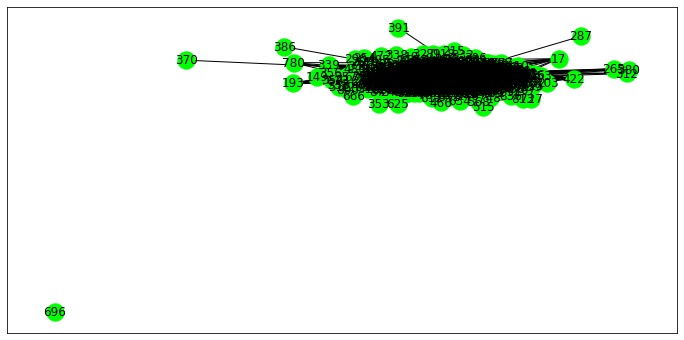

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [24]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.002399798014899434, 592),
 (0.002302076874932777, 719),
 (0.0022771973647556843, 436),
 (0.002234502070517605, 579),
 (0.002162233170389663, 214),
 (0.0021345480310070355, 538),
 (0.0020744662050574997, 954),
 (0.002069431080198559, 938),
 (0.0020552284773854156, 68),
 (0.002047843540820074, 551)]

In [25]:
mao_sentences[592]

'HITTING THE LANDLORDS POLITICALLY\nOnce the peasants have their organization, the first thing they do is to smash the political prestige and power of the landlord class, and especially of the local tyrants and evil gentry, that is, to pull down landlord authority and build up peasant authority in rural society'

In [27]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(10)]
top_sentence_indices

[592, 719, 436, 579, 214, 538, 954, 938, 68, 551]

In [28]:
print('\n\n'.join(np.array(mao_sentences)[top_sentence_indices]))

HITTING THE LANDLORDS POLITICALLY
Once the peasants have their organization, the first thing they do is to smash the political prestige and power of the landlord class, and especially of the local tyrants and evil gentry, that is, to pull down landlord authority and build up peasant authority in rural society

This situation has been brought about only in the last two or three months, that is, since the peasants have risen all over the countryside and overthrown the power of the local tyrants and evil gentry

It was on the strength of their extensive organization that the peasants went into action and within four months brought about a great revolution in the countryside, a revolution without parallel in history.

DOWN WITH THE LOCAL TYRANTS AND EVIL GENTRY!
ALL POWER TO THE PEASANT ASSOCIATIONS!
The main targets of attack by the peasants are the local tyrants, the evil gentry and the lawless landlords, but in passing they also hit out against patriarchal ideas and institutions, agains

## 2.2 Approach \#2: Leveraging PyTextRank
`pytextrank` is explained [here](https://derwen.ai/docs/ptr/explain_algo/).

We load spaCy with a language model for English:

In [29]:
import spacy
nlp = spacy.load("en_core_web_sm")

```
pip install pytextrank
```

In [30]:
DOCUMENT = '. '.join(mao_sentences)
len(DOCUMENT)

174486

`textrank` ranks phrases, not sentences:

In [31]:
import pytextrank

tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name='textrank', last=True)

doc = nlp(DOCUMENT)

# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print('{:.4f} {:5d}  {}'.format(p.rank, p.count, p.text))
    #print(p.chunks)

0.0741    89  peasant associations
0.0741     1  local peasant associations
0.0701   161  peasants
0.0700     1  such peasants
0.0687     1  many peasants
0.0680     4  peasant struggle
0.0677    34  poor peasants
0.0674     1  peasant authority
0.0667    13  rich peasants
0.0665     3  peasant schools
0.0658     1  peasant strength
0.0645     2  lazy peasants
0.0645     1  experienced peasants
0.0638     1  small peasant economy
0.0606     1  peasant credit societies
0.0504     2  revolutionary political power
0.0465     1  peasants democratic political power
0.0452    15  political power
0.0449     3  local party organizations
0.0447     1  the peasant associations orders
0.0445     2  the township peasant associations
0.0445   147  red army
0.0442     2  the provincial peasant association
0.0442     1  a district peasant association
0.0441     1  one ingenious township peasant association
0.0434     1  many such small areas
0.0430     1  red army rules
0.0427     2  the poor peasant

In [47]:
for p in doc._.phrases[3:7]:
    print('{:.4f} {:5d}  {}'.format(p.rank, p.count, p.text))
    for chunk in p.chunks:
        print(chunk.start, chunk.end, chunk)

0.0700     1  such peasants
7073 7075 Such peasants
0.0687     1  many peasants
29695 29697 many peasants
0.0680     4  peasant struggle
496 498 peasant struggle
2779 2782 the peasant struggle
2803 2806 the peasant struggle
8433 8437 the peasants' struggle
0.0677    34  poor peasants
7159 7161 poor peasants
7181 7183 poor peasants
19002 19004 poor peasants
19141 19143 poor peasants
24805 24807 poor peasants
6737 6740 the poor peasants
6764 6767 the poor peasants
6802 6805 the poor peasants
6954 6957 the poor peasants
7030 7033 the poor peasants
7034 7037 The poor peasants
7326 7329 the poor peasants
7369 7372 the poor peasants
7430 7433 the poor peasants
7494 7497 the poor peasants
7500 7503 the poor peasants
7941 7944 the poor peasants
17677 17680 the poor peasants
18631 18634 The poor peasants
18760 18763 the poor peasants
18814 18817 the poor peasants
18852 18855 the poor peasants
19099 19102 The poor peasants
19181 19184 the poor peasants
19189 19192 the poor peasants
19666 19669 t

In [32]:
len(doc._.phrases)

2939

`icecream` allows one to inspect variables, expressions, and program execution with a single, simple function call.
```
pip install icecream
```

In [33]:
from icecream import ic

In [34]:
for p in doc._.phrases:
    ic(p.rank, p.count, p.text)
    #ic(p.chunks)

ic| p.rank: 0.07407923554958394
    p.count: 89
    p.text: 'peasant associations'
ic| p.rank: 0.074062347061808
    p.count: 1
    p.text: 'local peasant associations'
ic| p.rank: 0.0700806176321585, p.count: 161, p.text: 'peasants'
ic| p.rank: 0.06999169510246983, p.count: 1, p.text: 'such peasants'
ic| p.rank: 0.0686893165009472, p.count: 1, p.text: 'many peasants'
ic| p.rank: 0.06800377216327319
    p.count: 4
    p.text: 'peasant struggle'
ic| p.rank: 0.06768469604175921, p.count: 34, p.text: 'poor peasants'
ic| p.rank: 0.06743310226817614
    p.count: 1
    p.text: 'peasant authority'
ic| p.rank: 0.06672069212413247, p.count: 13, p.text: 'rich peasants'
ic| p.rank: 0.06647575101594355, p.count: 3, p.text: 'peasant schools'
ic| p.rank: 0.06575217804797011
    p.count: 1
    p.text: 'peasant strength'
ic| p.rank: 0.06454242789017708, p.count: 2, p.text: 'lazy peasants'
ic| p.rank: 0.06451355153056698
    p.count: 1
    p.text: 'experienced peasants'
ic| p.rank: 0.06384519579350788


KeyboardInterrupt: 

We construct a list of sentence boundaries with a phrase vector initialized to an empty set:

In [35]:
sent_bounds = [ [s.start, s.end, set([])] for s in doc.sents ]
sent_bounds[:10]

[[0, 29, set()],
 [29, 49, set()],
 [49, 136, set()],
 [136, 166, set()],
 [166, 231, set()],
 [231, 268, set()],
 [268, 294, set()],
 [294, 345, set()],
 [345, 371, set()],
 [371, 391, set()]]

In [49]:
len(doc._.phrases)

2939

We iterate through our top-ranked phrases and add their id to our phrase vector for each sentence:

In [50]:
#limit_phrases = 4
limit_phrases = len(doc._.phrases)

phrase_id = 0
unit_vector = []

for p in doc._.phrases:
    #ic(phrase_id, p.text, p.rank)
    unit_vector.append(p.rank)

    for chunk in p.chunks:
        #ic(chunk.start, chunk.end)
        for sent_start, sent_end, sent_vector in sent_bounds:
            if chunk.start >= sent_start and chunk.end <= sent_end:
                #ic(sent_start, chunk.start, chunk.end, sent_end)
                sent_vector.add(phrase_id)
                break

    phrase_id += 1
    if phrase_id == limit_phrases:
        break

In [51]:
len(unit_vector)

2939

In [52]:
i = 0
for sent in doc.sents:
    ic(sent)
    i += 1
    if i == 3: break

ic| sent: Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take.
ic| sent: Though they believe that a revolutionary high tide is inevitable, they do not believe it to be imminent.
ic| sent: Therefore, they disapprove of the plan to take Kiangsi and only approve of roving guerrilla actions in the three areas on the borders of Fukien, Kwangtung and Kiangsi; at the same time, as they do not have a deep understanding of what it means to establish Red political power in the guerrilla areas, they do not have a deep understanding of the idea of accelerating the nation-wide revolutionary high tide through the consolidation and expansion of Red political power.


We normalize our unit_vector for all of the phrases:

In [53]:
sum_ranks = sum(unit_vector)

unit_vector = [ rank/sum_ranks for rank in unit_vector ]
unit_vector[0:10]

[0.0021851393552836476,
 0.00218464119005534,
 0.002067190819323658,
 0.0020645678424833524,
 0.0020261511563964456,
 0.002005929431632012,
 0.0019965175392808177,
 0.001989096195740728,
 0.001968082001529569,
 0.001960856893828881]

We now iterate through each sentence, calculating its euclidean distance from the unit vector:

In [54]:
from math import sqrt

sent_rank = {}
sent_id = 0

for sent_start, sent_end, sent_vector in sent_bounds:
    #ic(sent_vector)
    sum_sq = 0.0
    ic
    for phrase_id in range(len(unit_vector)):
        #ic(phrase_id, unit_vector[phrase_id])

        if phrase_id not in sent_vector:
            sum_sq += unit_vector[phrase_id]**2.0

    sent_rank[sent_id] = sqrt(sum_sq)
    sent_id += 1

In [57]:
i = 0
for v in range(10):
    print(i, sent_rank[i])

0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086
0 0.023705466876065086


Sort the sentence indexes in descending order

In [58]:
from operator import itemgetter

sorted(sent_rank.items(), key=itemgetter(1)) 

[(967, 0.023419933164767554),
 (1347, 0.02343638287200435),
 (845, 0.02345032964099259),
 (1114, 0.023491957126090902),
 (799, 0.02349431662738133),
 (969, 0.023516423130198662),
 (624, 0.023518105366304096),
 (859, 0.023522045222612423),
 (796, 0.023522957823726216),
 (603, 0.02352313568802015),
 (11, 0.023535561588759468),
 (826, 0.023536933755319782),
 (1274, 0.023540351884994534),
 (12, 0.023540862792461415),
 (867, 0.023544755247843635),
 (1059, 0.023544766224220717),
 (1235, 0.023545799403074923),
 (1265, 0.023546468714470272),
 (798, 0.023549131462863714),
 (601, 0.02354992583005697),
 (734, 0.02355178249872474),
 (1169, 0.023552452748136835),
 (1139, 0.0235526257484712),
 (1231, 0.02355981181520467),
 (820, 0.02356013772431822),
 (1310, 0.023561424249130502),
 (783, 0.023561551622191288),
 (1288, 0.023565622716596412),
 (1047, 0.023568803431039755),
 (728, 0.02356903400663715),
 (755, 0.023572192748314656),
 (1320, 0.023572287617116664),
 (1307, 0.02357382872894364),
 (1346, 0.

Extract the sentences with the lowest distance, up to the limit requested...

In [59]:
limit_sentences = 5

sent_text = {}
sent_id = 0

for sent in doc.sents:
    sent_text[sent_id] = sent.text
    sent_id += 1

num_sent = 0

for sent_id, rank in sorted(sent_rank.items(), key=itemgetter(1)):
    ic(sent_id, sent_text[sent_id])
    num_sent += 1

    if num_sent == limit_sentences:
        break

ic| sent_id: 967
    sent_text[sent_id]: ('In the southern and central parts where the peasant movement is well '
                         'developed, the landlord class cannot hold its own because of the tremendous '
                         'momentum with which the peasants have risen, and its armed forces have '
                         'largely capitulated to the peasant associations and taken the side of the '
                         'peasants; examples of this are to be found in such counties as Ninghsiang, '
                         'Pingkiang, Liuyang, Changsha, Liling, Hsiangtan, Hsianghsiang, Anhua, '
                         'Hengshan and Hengyang.')
ic| sent_id: 1347
    sent_text[sent_id]: ('The following are tasks of great importance for the Party in the border area '
                         'in connection with the insurrections unfolding in Hunan, Hupeh and Kiangsi: '
                         "Extend the influence of the agrarian revolution and of the people's "
      

## 2.3 Applying this methodology with BERT embeddings
Instead of computing a sentence similarity matrix by multiplying the `dt_matrix` matrix by its transpose to indicate how similar two sentences are by how many words in common they have, we use the BERT embedding cosine metric to evaluate how similar two sentences are and thus generate our weighted graph. Then we proceed just as above, leveraging `networkX`.

For the `pytextrank` approach, we need a better understanding. Does it work by phrases, full sentences? Can we replace the sentence with its BERT embedding?

# 3. Using k-Means

This is the approach Nan and Chuanyang followed, and also Dr. Miller's approach. We all clustered based on BERT embeddings. But we are not sure how many clusters to use. Use ELBOW criterion?

We should use them *all*, or use a threshold strategy to remove clusters composed of only a few sentences.

Find the cluster centroid for each cluster, and use the cluster centroid as our term (instead of sentence words). Each sentence has a BERT embedding, and that BERT embedding vector can be expressed as a linear combination of cluster centroid vectors.

*Then* we follow a singular value decomposition approach to find a low dimensional representation of **beliefs**.

We import the package Sentence Transformer and load the stsb-roberta-large model:

In [60]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('stsb-roberta-large')

In [61]:
mao_sentences[0]

'Some comrades in our Party still do not know how to appraise the current situation correctly and how to settle the attendant question of what action to take'

Chuanyang's model:

In [62]:
bert_embeddings = model.encode(mao_sentences[0:3])
bert_embeddings.shape

(3, 1024)

In [63]:
bert_embeddings[0]

array([ 0.27242586,  0.721691  ,  0.24801187, ...,  1.1603775 ,
       -2.2897995 ,  1.7773815 ], dtype=float32)

Another possibility (Nan's):

In [64]:
model2 = SentenceTransformer('bert-base-nli-mean-tokens')

Some weights of the model checkpoint at C:\Users\Dino/.cache\torch\sentence_transformers\sbert.net_models_bert-base-nli-mean-tokens\0_BERT were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [65]:
bert_embeddings2 = model2.encode(mao_sentences[0:3])
bert_embeddings2.shape

(3, 768)

## Chuanyang and Nan's approach
Chuanyang caculates the similarity between sentences by using cosine_similarity on the embeddings. 

Chuanyang finds the clusters using k-means, then proceeds to find the centroid of each cluster.

I think we should try all three methods (k-means, pagerank, svd) and compare. We should also use the same texts (the ones I use in this notebook).

We should also compare our clusters with the Topic clusters that we created using `pyCaret`. 

Are our clusters similar or different? an we plot differences in any way to try to zero in on which approach generates more meaningful results? Or can we devise a testing scheme so that we can objectively compare which approach yields the more correct results?

Classic pagerank links sentences by simlarity based on the number of words in common. How can we link sentences based on cosine distance?

SVD does a low-dimensional projection on the similarity matrix. How can we compute a simlarity matrix with cosine distance?

## Nan: K-means with Gap statistic

The `K` for `K-means` alogrithm is a key parameter. To pick up a reasonable `K`, here we introduce the `Gap statistic` meathod ([detail](https://statweb.stanford.edu/~gwalther/gap)).  `Gap statistic` can estimate the number of clusters in a set of data.

We use `gap_statistic` package to do that, see implementation detail at: https://github.com/milesgranger/gap_statistic

In [ ]:
# ! pip install --upgrade gap-stat

In [ ]:
from gap_statistic import OptimalK

optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')

In [ ]:
from gap_statistic import OptimalK

optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')

In [ ]:
optimalK.gap_df.head()

In [ ]:
optimalK.plot_results()

In [ ]:
# using the best K = 12 for k-means
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=12, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(norm_data)

y_km

Then we can assign each sentence to its cluster, and for each cluster get the cosine distance between
any sentence and any other sentences in the cluster. We can then pick the sentence closest to the *imaginary* (theoretic) cluster centroid, or the sentence with the lowest sum of cosine distances with all other sentences. We can then assume that this sentence is the *real* centroid of the cluster.

We can also remove sentences that don't have too much meaning. Nan tried using a Bayesian based anti-spam filter for that, which I think is a very ingenious idea.

# 4. Testing
From our most dense clusters that we evaluated using any of our 3 approaches (LSI, PageRank, k-Means), take the existing sentence closest to its centroid. If we have 300 clusters, that means 300 sentences. Add them to a brand new document.

Generate a million "fake" sentences using our mao LSTM. For each, compute which cluster it belongs to. Add these sentences to the document in proportion to importance of each cluster. For example, if cluster \#1 is the most dense (most sentences in the corpus), then we add to the new document the most of our "fake" sentences. But do not add any "fake" sentences that are closer to the imaginary cluster centroid than our real sentences above. The result is that we generate fake Mao document that preserves our clusters.

We can also generate fake sentences by borrowing sentences from our topic models, and picking those that are not very meaningul. How do we distinguish meaningul from non-meaningul sentences? I don't know if we can talk about **meaning** *objectively*, but I thunk we can talk about meaning from a BERT embedding perspective. Is it true, for example, that a BERT embedding with a bigger norm is more meaningul than a BERT embedding with a smaller norm? We need to run experiments on this...

>**Note**: Noam Chomsky, famous linguist, makes a point regarding the independence of syntax and semantics: His well-known sentence “***Colorless green ideas sleep furiously***” illustrates how a sentence can be well-formed grammatically and yet have no meaningful content.

If we add meaningless, grammtically non-sensical sentences, e.g. `Dad said that she’d pick me up at four o’clock`, will BERT detect them by giving them short norms?

>What are the ways to detect whether a sentence is sensible or not using Natural Language Processing?
Originally Answered: What are the ways to detect whether the sentence is sensible or not using Natural Language Processing?
One simple and not so sophisticated approach would be following the 2 steps

>1. Get the corpus Parts-Of-Speech {POS} tagged

>2. Write a Rule based syntax Evaluator based on the POS tags

Then, we test that by applying our methodology, we can recover the real sentences from the fake ones. If we can, we can say we found a way to retrieve the most representative sentences and to identify all the clusters.

Now that we have beliefs expressed as cluster centroids, we need to coax chatbots to generate text that preserves cluster density